# Memahami Kinerja Siswa (nilai ujian) yang dipengaruhi oleh beberapa variabel lain menggunakan model Linear Regression
tujuan : untuk memahami bagaimana kinerja siswa (nilai ujian) dipengaruhi oleh faktor2 lain seperti Jenis Kelamin, Etnis, Tingkat pendidikan orang tua, Makan Siang dan kursus persiapan Ujian dan diprediksi menggunakan model linear regression

### Kelompok 8
- 2109106028 Muhammad Nandaaarjuna Fadhillah
- 2109106035 Ardi Setyiawan
- 2109106038 Diky Dwicandra
- 2109106043 Hadie Pratama Tulili

## Library

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('D:/Kuliah/Semester 6/Machine Learning/program/StudentsPerformance.csv')

## Load Data

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## Assesing Data

In [5]:
df.isna().sum() #menghitung jumlah value yang hilang

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
print("Jumlah Data duplikasi : ", df.duplicated().sum())

Jumlah Data duplikasi :  0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique() #menghitung jumlah nilai unik

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe() #menghasilkan ringkasan statistik

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Mengubah Informasi pada kolom 

In [10]:
df['test preparation course'] = df['test preparation course'].map({
    'completed' : 'complete',
    'none' : 'not complete'
})
df.head()
    

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,not complete,72,72,74
1,female,group C,some college,standard,complete,69,90,88
2,female,group B,master's degree,standard,not complete,90,95,93
3,male,group A,associate's degree,free/reduced,not complete,47,57,44
4,male,group C,some college,standard,not complete,76,78,75


In [17]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()
print("data numerik : ", numeric)
print("data kategorikal : ", categorical)

data numerik :  ['math score', 'reading score', 'writing score', 'total score', 'average']
data kategorikal :  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Menambah kolom untuk menghitung total score dan rata2

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,not complete,72,72,74,218,72.666667
1,female,group C,some college,standard,complete,69,90,88,247,82.333333
2,female,group B,master's degree,standard,not complete,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,not complete,47,57,44,148,49.333333
4,male,group C,some college,standard,not complete,76,78,75,229,76.333333


In [19]:
complete = df[df['test preparation course'] == 'complete'].shape[0]
not_complete = df[df['test preparation course'] == 'not complete'].shape[0]
print("Jumlah Siswa yang Lulus : ",complete)
print("Jumlah Siswa yang Tidak Lulus : ",not_complete)

Jumlah Siswa yang Lulus :  358
Jumlah Siswa yang Tidak Lulus :  642


## Visualisasi Data

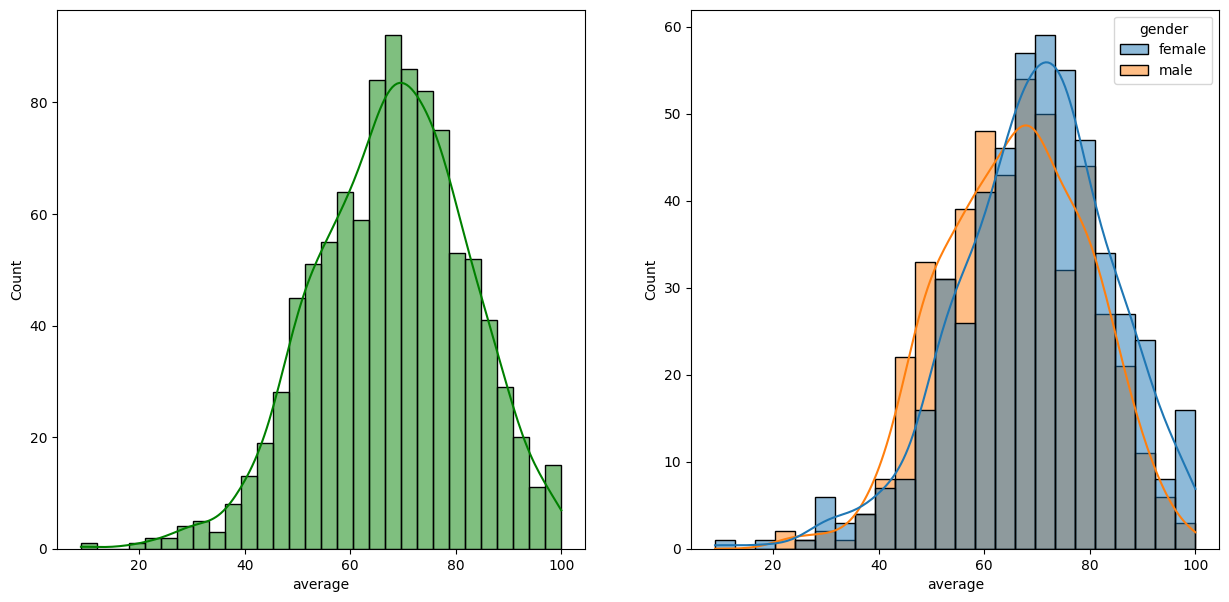

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

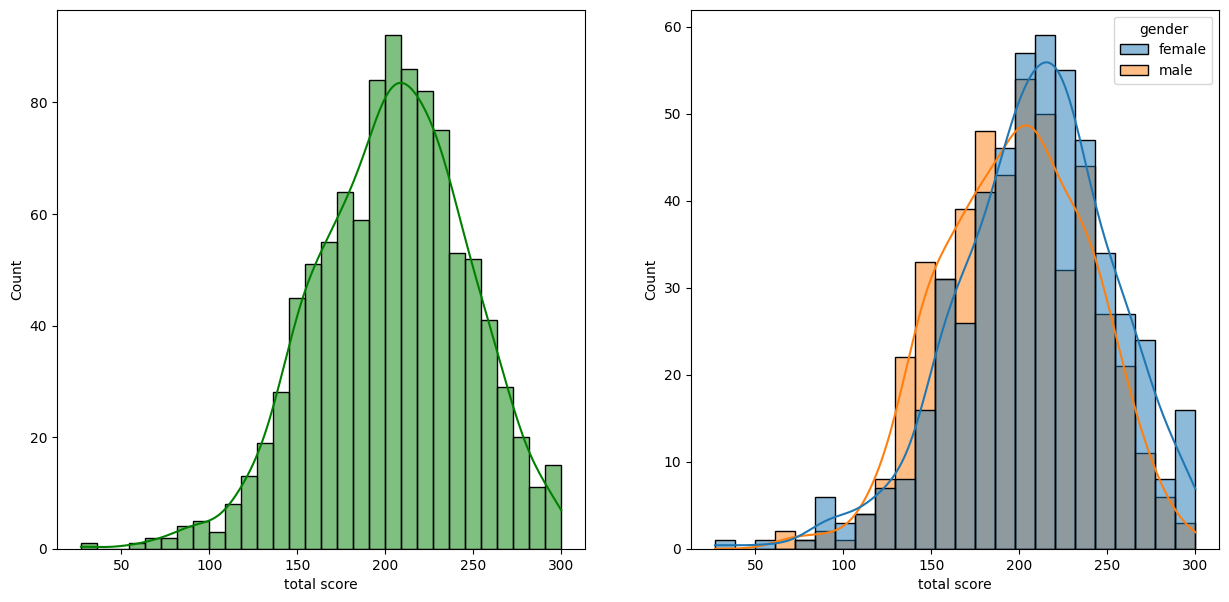

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

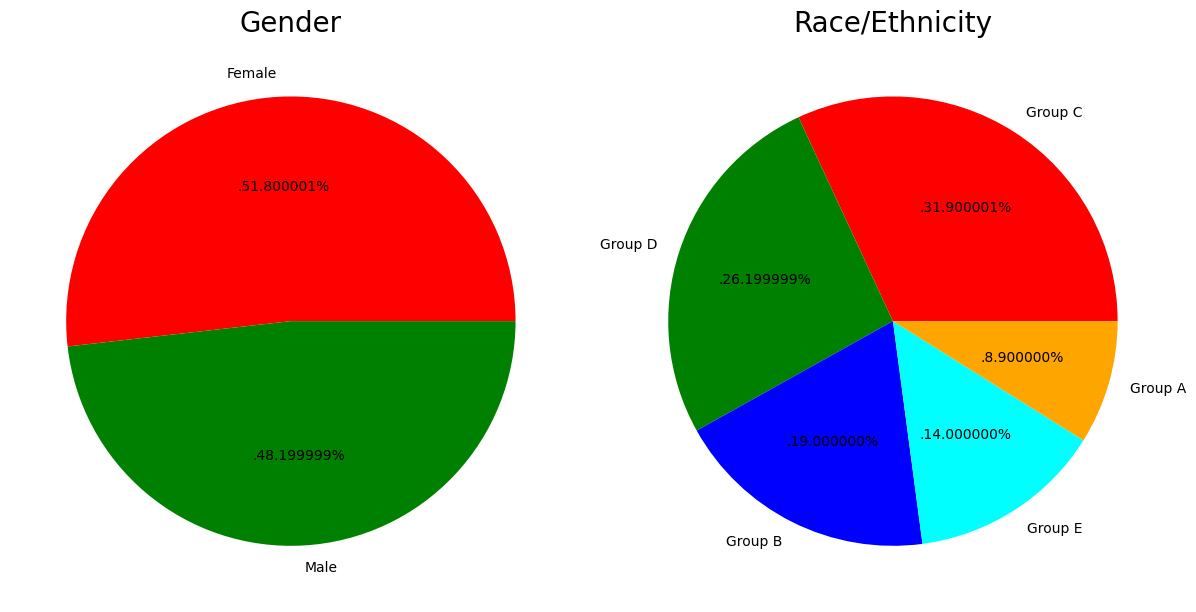

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


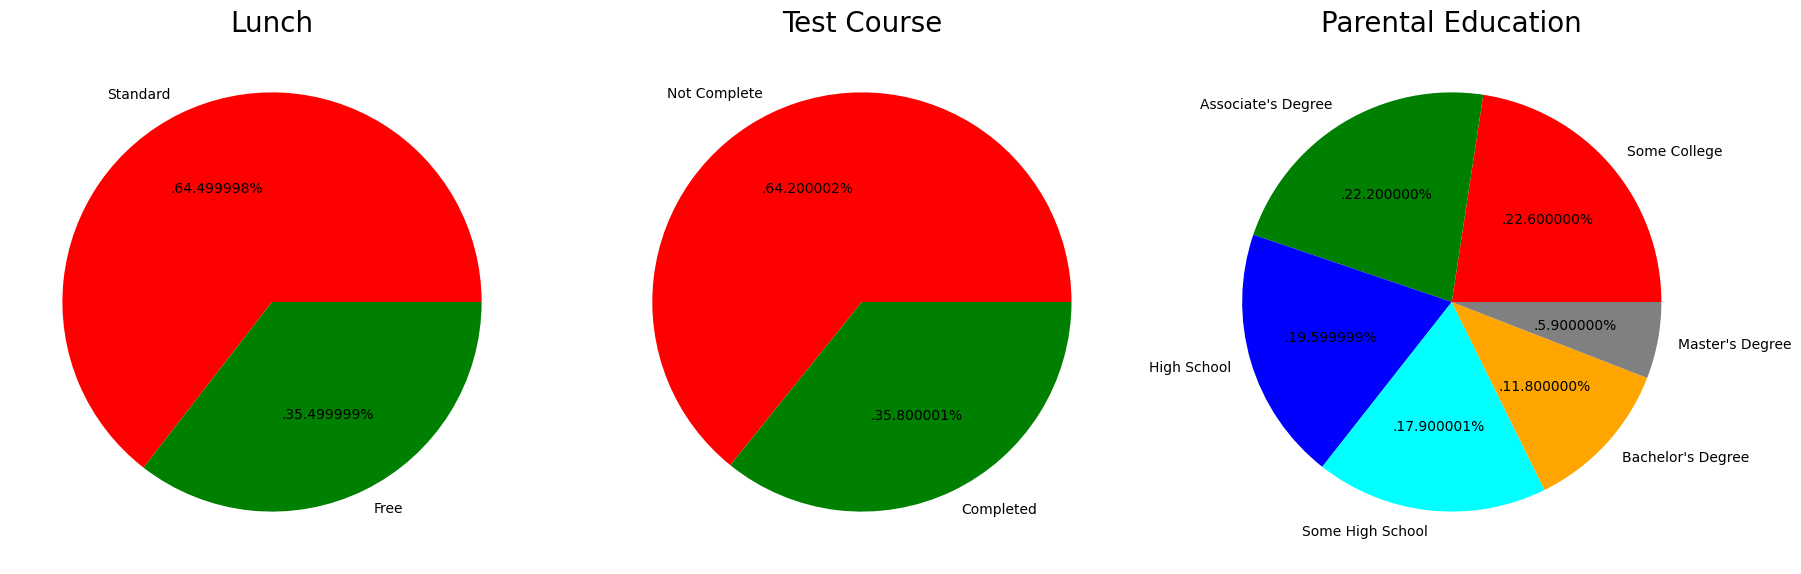

In [30]:
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'Not Complete', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

## Data Preprocessing

In [32]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

In [33]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

num_features, cat_features

(Index(['reading score', 'writing score', 'total score', 'average'], dtype='object'),
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course'],
       dtype='object'))

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler() #digunakan untuk scaling fitur-fitur numerik.
oh_transformer = OneHotEncoder() #digunakan untuk melakukan one-hot encoding pada fitur-fitur kategorikal.

preprocessor = ColumnTransformer( #menggabungkan dua transformers
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [35]:
X = preprocessor.fit_transform(X) 
#mengembalikan data yang telah diubah (transformed data), yang kemudian disimpan kembali ke variabel X

## Membagi Dataset Train dan Test

In [36]:
from sklearn.model_selection import train_test_split #untuk membagi dataset menjadi data training dan data testing.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, #Menentukan proporsi data yang akan dijadikan data testing
                                                    random_state=42 #Digunakan untuk menentukan seed untuk random number generator.)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape 
#digunakan untuk menampilkan dimensi (ukuran) dari data training dan data testing setelah dilakukan pemisahan 

((800, 21), (800,), (200, 21), (200,))

## Modeling menggunakan metode Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression #untuk membuat model regresi linier.

model = LinearRegression(fit_intercept=True) 


- Membuat objek model regresi linier dengan menggunakan LinearRegression
- fit_intercept=True menunjukkan bahwa model akan mencari garis regresi yang paling sesuai dengan data dengan mempertimbangkan nilai intersepsi.

In [39]:
model = model.fit(X_train, y_train) #model yang sudah dilatih, yang kemudian disimpan kembali ke variabel model.

## Testing

In [40]:
y_pred = model.predict(X_test) #untuk membuat prediksi nilai target berdasarkan data fitur (features) yang diberikan.

In [41]:
y_pred[:5] #menampilkan lima nilai pertama dari array y_pred.

array([91., 53., 80., 74., 84.])

## Evaluasi

In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted) 
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

- Mean Absolute Error mengukur rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya.
- Mean Squared Error mengukur rata-rata dari kuadrat selisih antara nilai prediksi dan nilai sebenarnya.
- Root Mean Squared Error adalah akar dari rata-rata dari kuadrat dari selisih antara nilai prediksi dan nilai sebenarnya.Root Mean Squared Error adalah akar dari rata-rata dari kuadrat dari selisih antara nilai prediksi dan nilai sebenarnya.
- R-squared Score adalah metrik evaluasi yang menyatakan seberapa baik model cocok dengan data.

In [43]:
mae, rmse, r2 = evaluate_model(y_test, y_pred)
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(rmse))
print("- Mean Absolute Error: {:.4f}".format(mae))
print("- R2 Score: {:.4f}".format(r2))

Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


hasil evaluasi menunjukkan bahwa model regresi linier memiliki kinerja yang sangat baik dalam memprediksi nilai target pada data testing. 

## Visualisasi Prediksi dan Testing

Text(0, 0.5, 'Predicted')

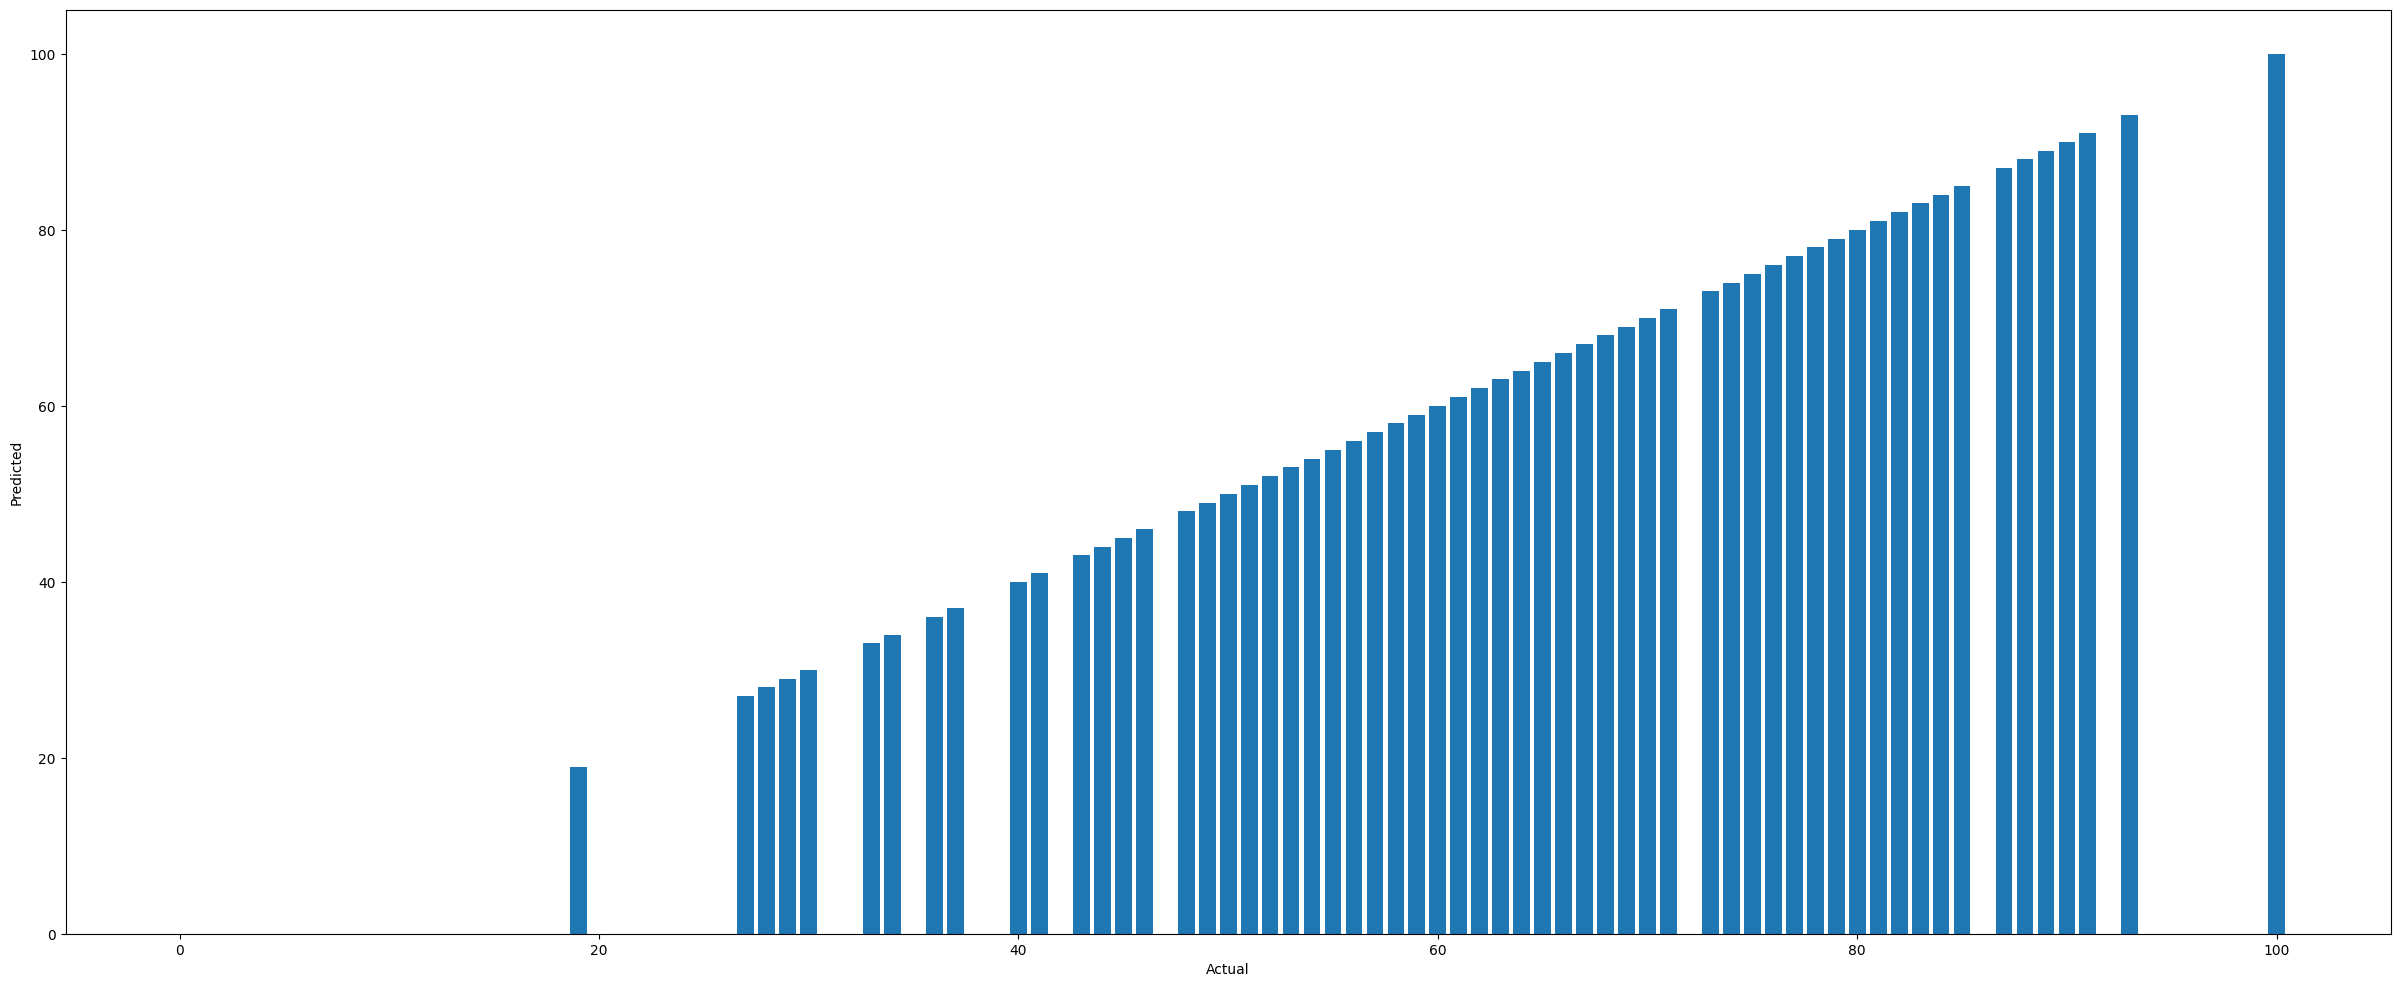

In [46]:
plt.bar(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')